In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

#from astroquery.esasky import ESASky
#from astroquery.utils import TableList
from astropy.wcs import WCS
#from reproject import reproject_interp

In [2]:
loc = '/scratch3/projects/meerchoirs/jcviljoen/output_'
vers = 'final' 
loc2 = '/cubes/cube_2/'
name= '_J1059_09_HI.image'
fullname = loc+vers+loc2+vers+name
ext = '.fits'
mom0 = '_mom0'
mom1 = '_mom1'
outloc = loc+vers+loc2 + 'cleaned/' +vers+name

In [3]:
hdu_list = fits.open(fullname+mom0+ext)
hdu_list.info()
hdu1_list = fits.open(fullname+mom1+ext)
hdu1_list.info()

Filename: /scratch3/projects/meerchoirs/jcviljoen/output_final/cubes/cube_2/final_J1059_09_HI.image_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: /scratch3/projects/meerchoirs/jcviljoen/output_final/cubes/cube_2/final_J1059_09_HI.image_mom1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   


In [4]:
data_mom1 = fits.getdata(fullname+mom1+ext)
header_mom1 = fits.getheader(fullname+mom1+ext)
data_mom0 = fits.getdata(fullname+mom0+ext)
header_mom0 = fits.getheader(fullname+mom0+ext)

In [5]:
print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)

<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)


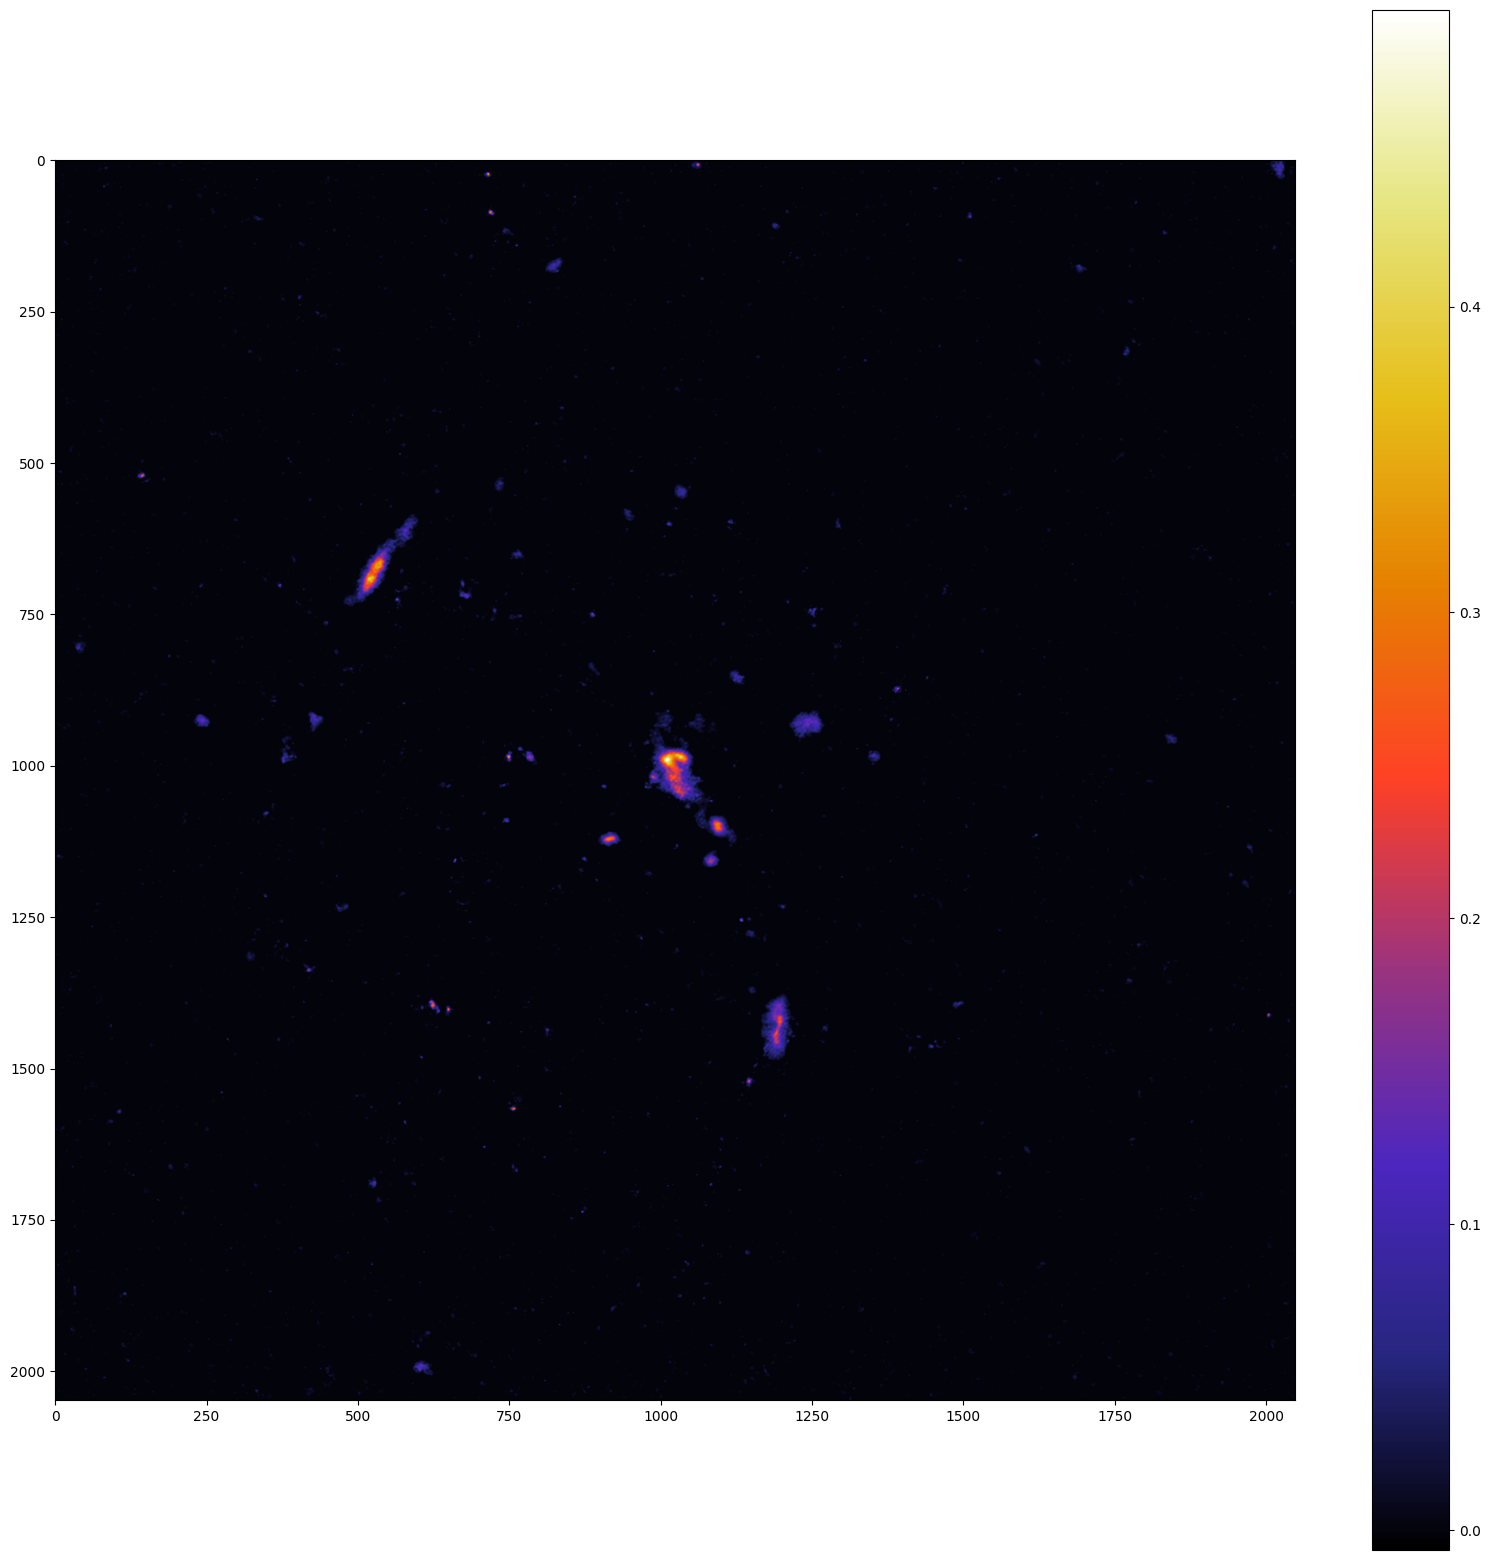

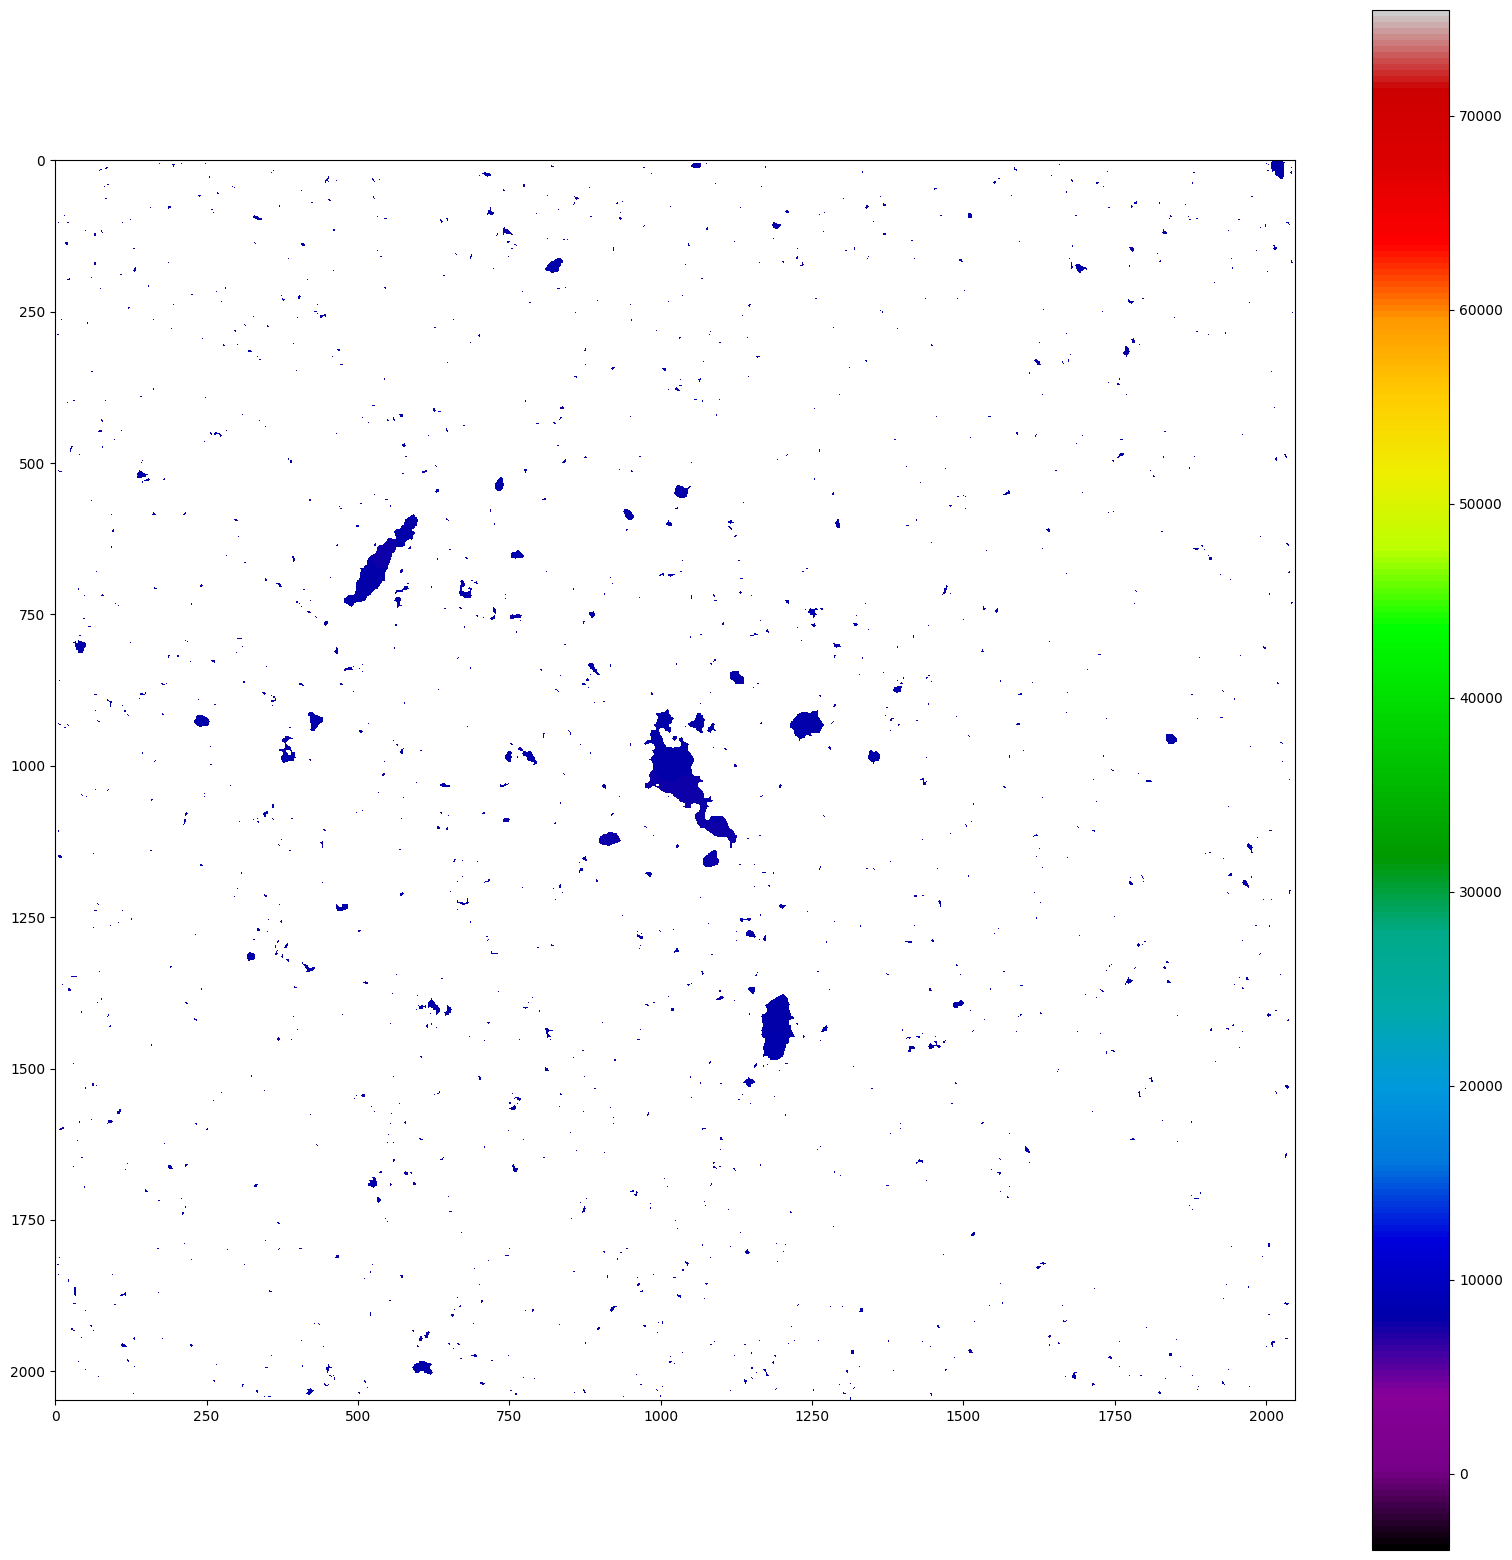

In [6]:
plt.figure(figsize = (20,20))
plt.imshow(data_mom0, cmap='CMRmap')
plt.colorbar()

plt.figure(figsize = (20,20))
plt.imshow(data_mom1, cmap='nipy_spectral')
plt.colorbar()

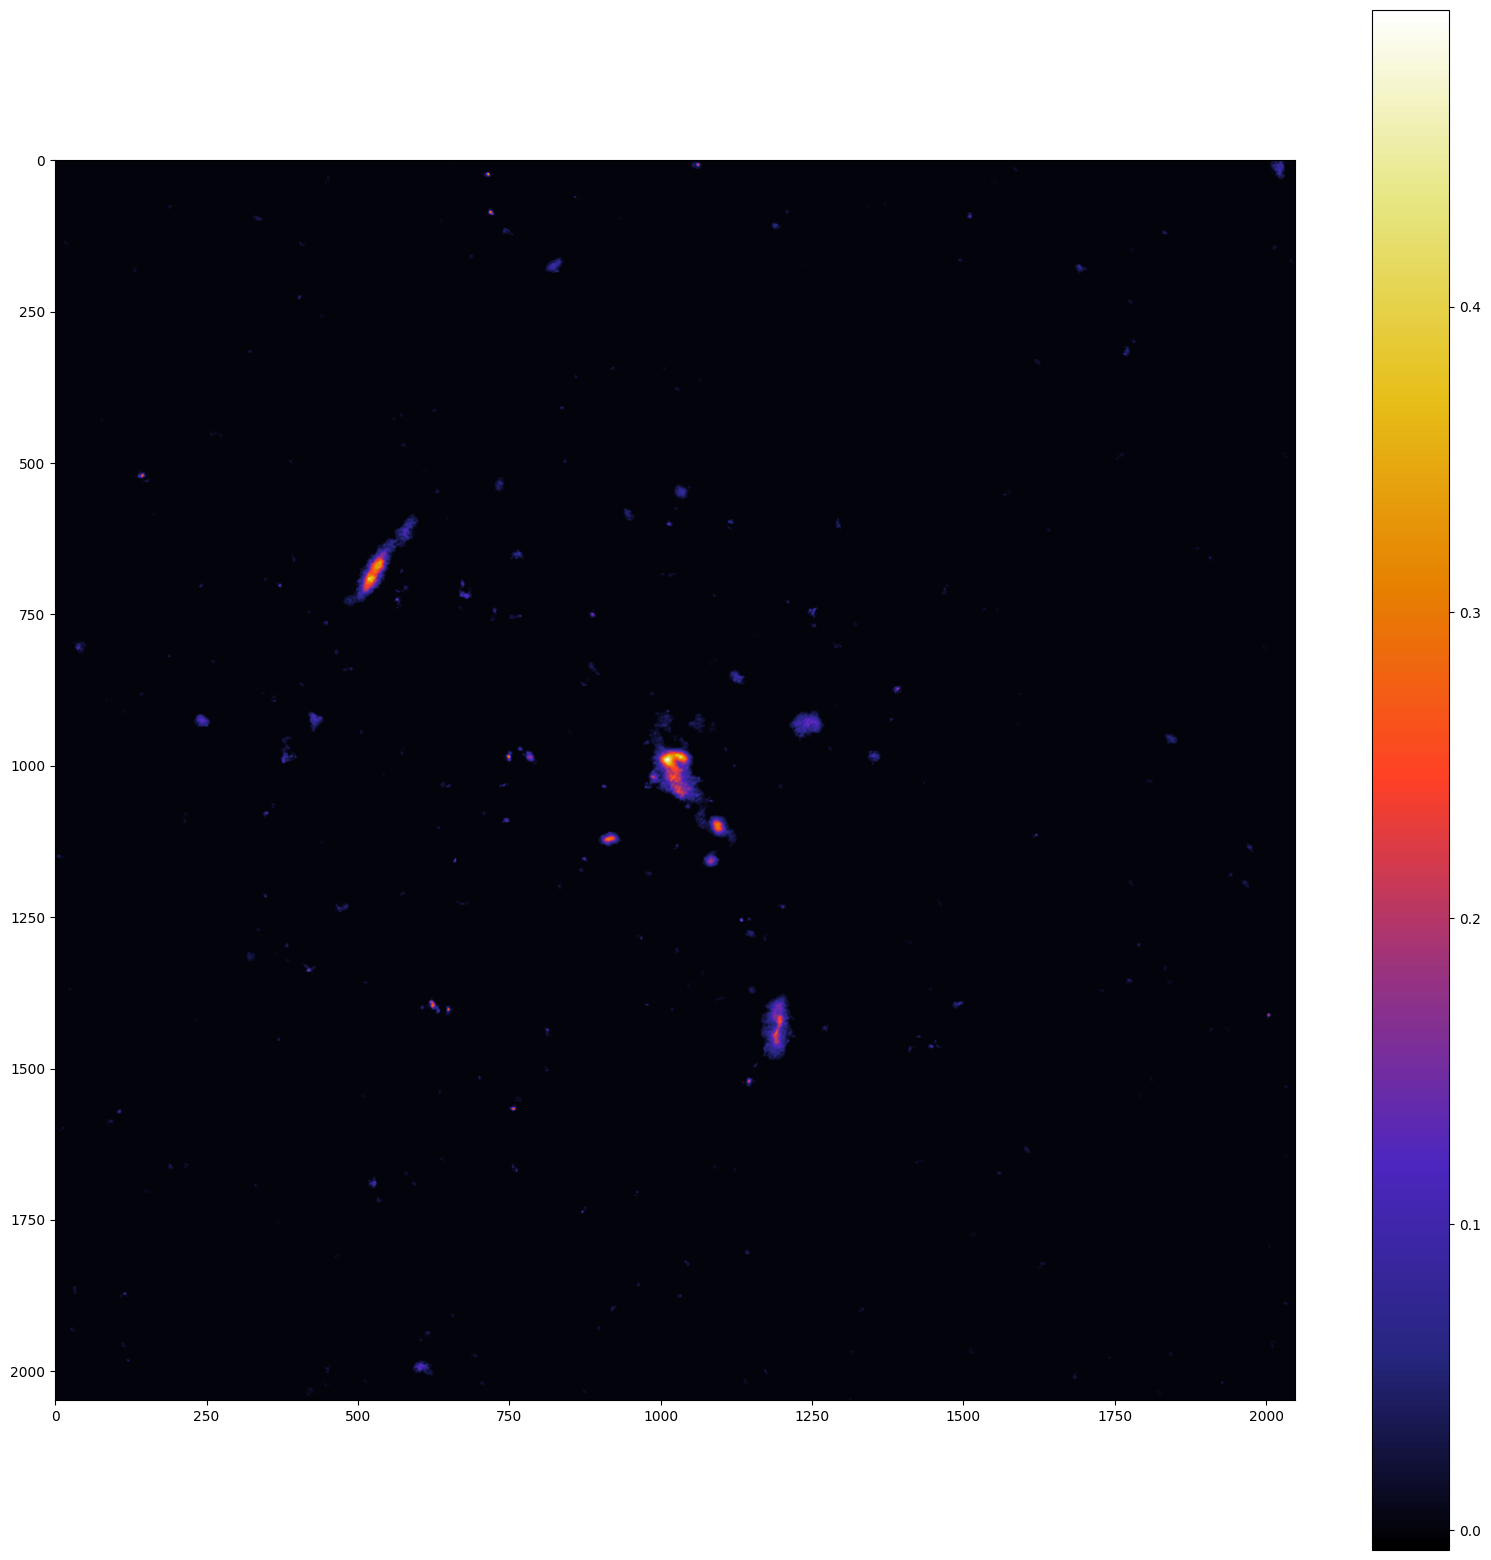

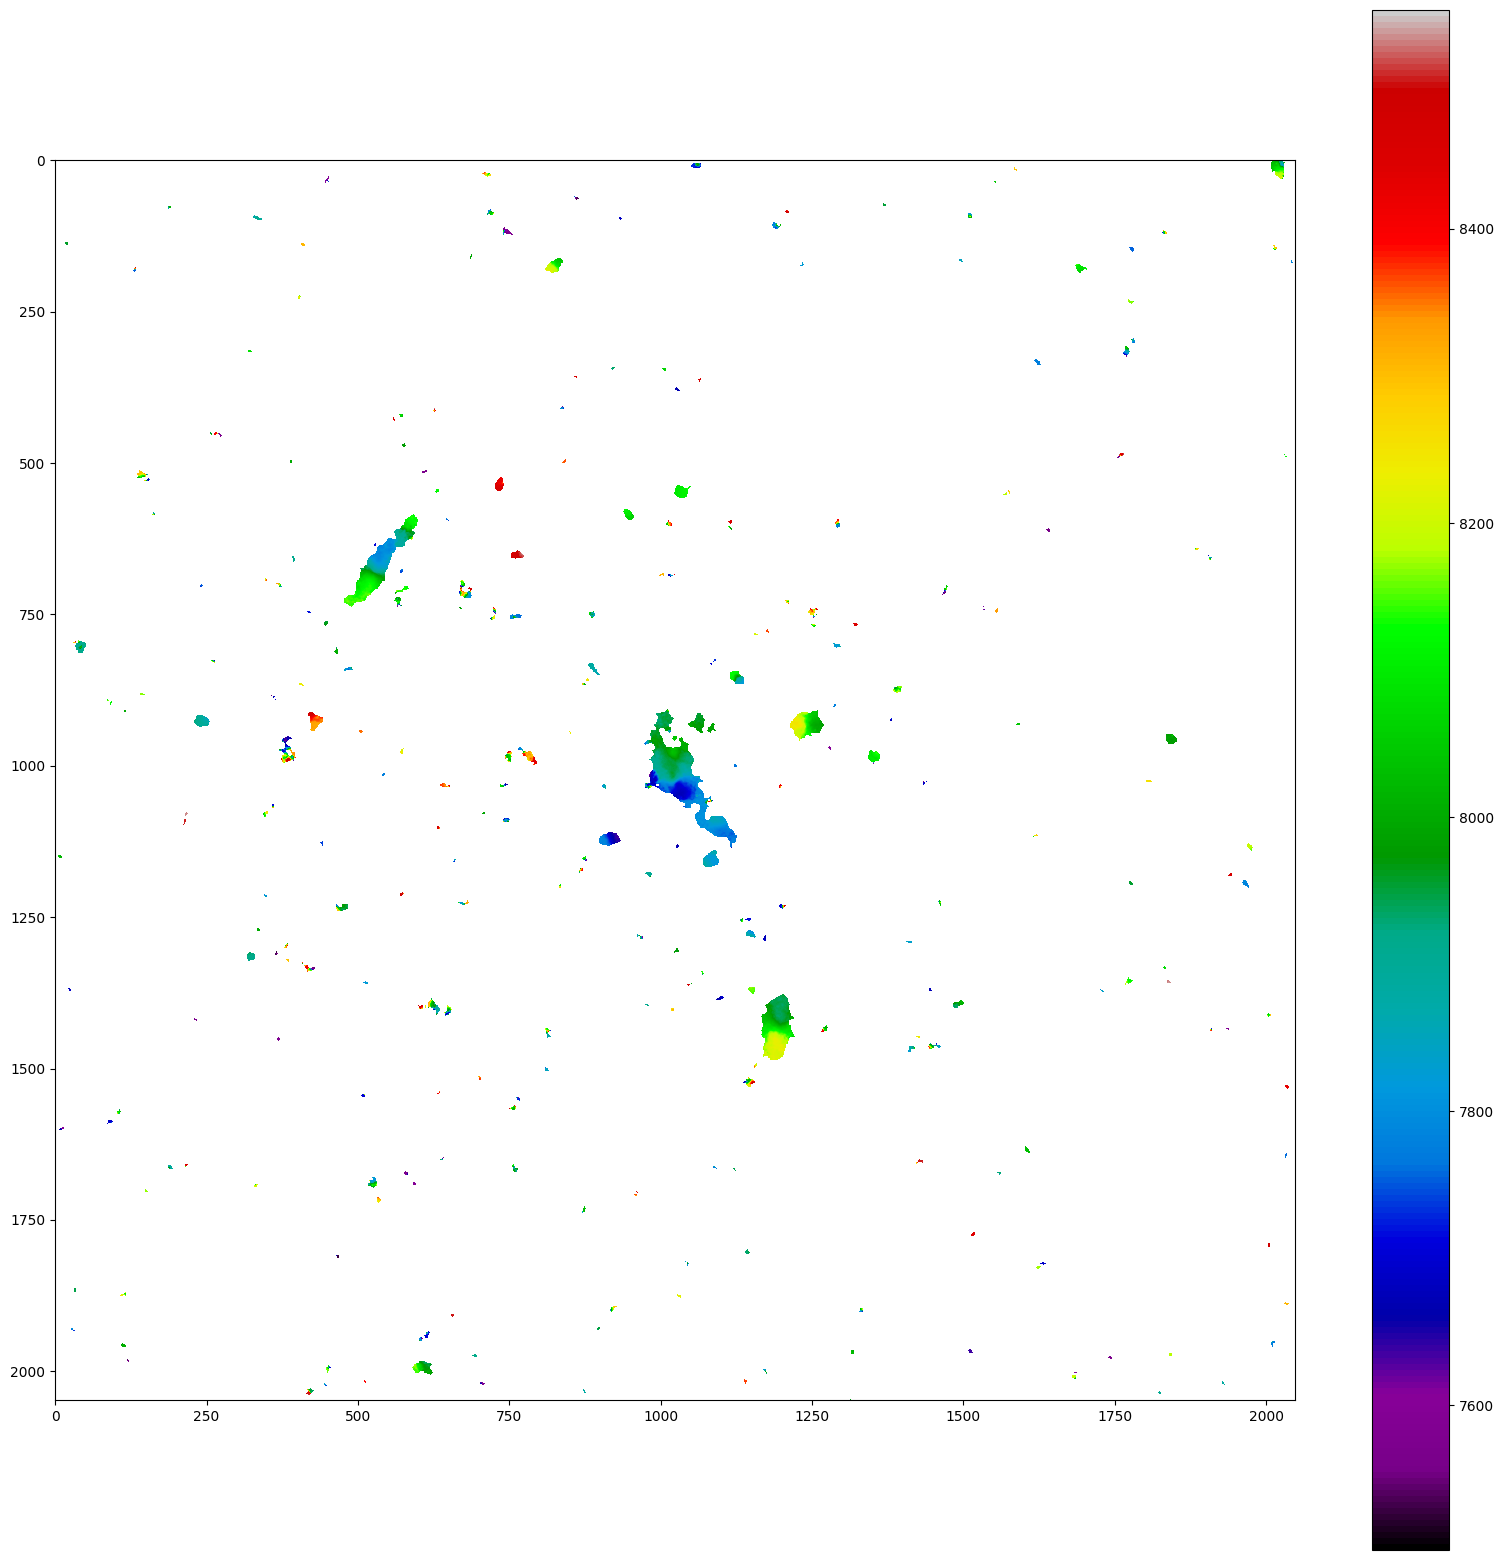

In [7]:
copy0 = np.copy(data_mom0)
copy1 = np.copy(data_mom1)
m = 2048
l = 2048
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if copy0[i,j] != 0.0:
                flag = False
                count = 0
                avgvel = 0
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if copy0[i+k,j+k] == 0.0 and copy0[i-k,j+k] == 0.0 and copy0[i+k,j-k] == 0.0 and copy0[i-k,j-k] == 0.0:
                            flag = True
                        if copy0[i+k,j] == 0.0 and copy0[i-k,j] == 0.0 and copy0[i,j-k] == 0.0 and copy0[i,j+k] == 0.0:
                            flag = True
                if flag:
                    copy0[i,j] = 0.0
                    copy1[i,j] = math.nan
                    
for i in range(0, m):
    for j in range(0, l):
                flag = False
                if copy1[i,j] < 7500 or copy1[i,j] > 8550:
                    if i < (m-1) and j < (l-1) and i > 1 and j > 1:
                        if copy0[i+1,j+1] != 0.0:
                            avgvel+= copy1[i+1,j+1]
                            count += 1
                        if copy0[i-1,j+1] != 0.0:
                            avgvel+= copy1[i-1,j+1]
                            count += 1
                        if copy0[i+1,j-1] != 0.0:
                            avgvel+= copy1[i+1,j-1]
                            count += 1
                        if copy0[i-1,j-1] != 0.0:
                            avgvel+= copy1[i-1,j-1]
                            count += 1

                        if copy0[i+1,j] != 0.0:
                            avgvel+= copy1[i+1,j]
                            count += 1
                        if copy0[i-1,j] != 0.0:
                            avgvel+= copy1[i-1,j]
                            count += 1
                        if copy0[i,j-1] != 0.0:
                            avgvel+= copy1[i,j-1]
                            count += 1
                        if copy0[i,j+1] == 0.0:
                            avgvel+= copy1[i,j+1]
                            count += 1

                    flag2 = False
                    if (i < 1140 and i > 890 and j < 1150 and j > 950): 
                        flag2 = True
                    if (i<970 and i>900 and j<1280 and j>1200):
                        flag2 = True
                    if (i<1140 and i > 1100 and j <950 and j>890):
                        flag2 = True
                    if (i<1180 and i > 1130 and j <1100 and j>1065):
                        flag2 = True
                    if (i<851 and i > 846 and j <1255 and j>1247):
                        flag2 = True
                    if (i<880 and i > 830 and j <1150 and j>1100):
                        flag2 = True
                    if (i<1500 and i > 1370 and j <1230 and j>1160):
                        flag2 = True
                    if (i<750 and i > 500 and j <650 and j>450):
                        flag2 = True
                    if (i<2020 and i > 1970 and j <630 and j>580): 
                        flag2 = True
                    if (i<190 and i > 150 and j <850 and j>800): 
                        flag2 = True
                    if (i<40 and i > 0 and j <2048 and j>2000): 
                        flag2 = True
                    if (i<950 and i > 900 and j <450 and j>410): 
                        flag2 = True
                    if (i<1365 and i > 1345 and j <1785 and j>1760): 
                        flag2 = True
                    if (i<570 and i > 530 and j <1060 and j>1010): 
                        flag2 = True
                    if (i<1290 and i > 1268 and j <1166 and j>1138): 
                        flag2 = True

                    if flag2:
                        flag = flag
                    else:
                        flag = True
                    
                    if count<= 2:
                        flag = True
                    else:
                        copy1[i,j] = avgvel/count
                
                if flag:
                    copy0[i,j] = 0.0
                    copy1[i,j] = math.nan  

plt.figure(figsize = (20,20))
plt.imshow(copy0, cmap='CMRmap')
plt.colorbar()

plt.figure(figsize = (20,20))
plt.imshow(copy1, cmap='nipy_spectral')
plt.colorbar()

In [8]:
hdu = fits.PrimaryHDU(copy0, header=header_mom0)
hdu.writeto(outloc+'_mom0_cleaned1'+ext, overwrite=True)
hdu = fits.PrimaryHDU(copy1, header=header_mom1)
hdu.writeto(outloc+'_mom1_cleaned1'+ext, overwrite=True)

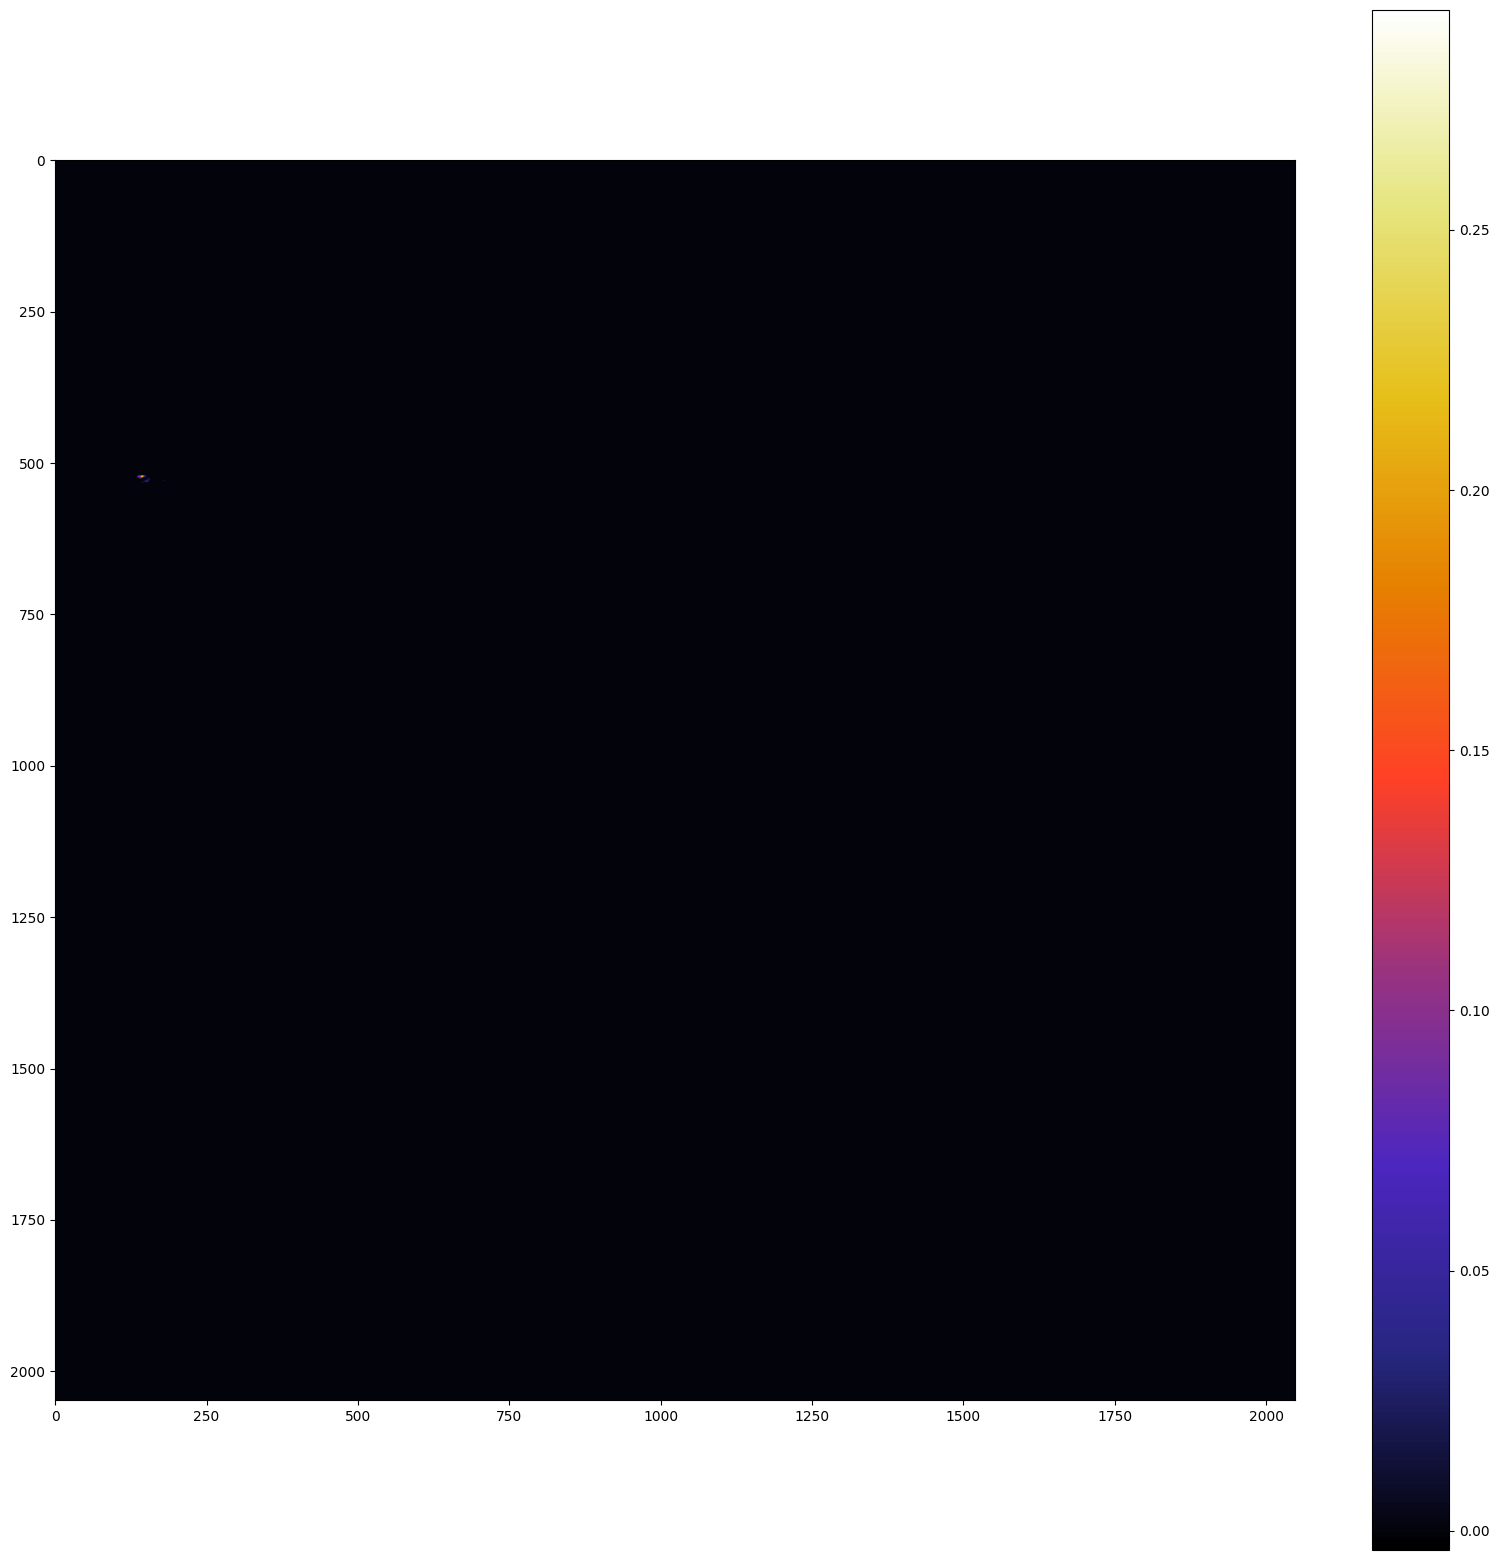

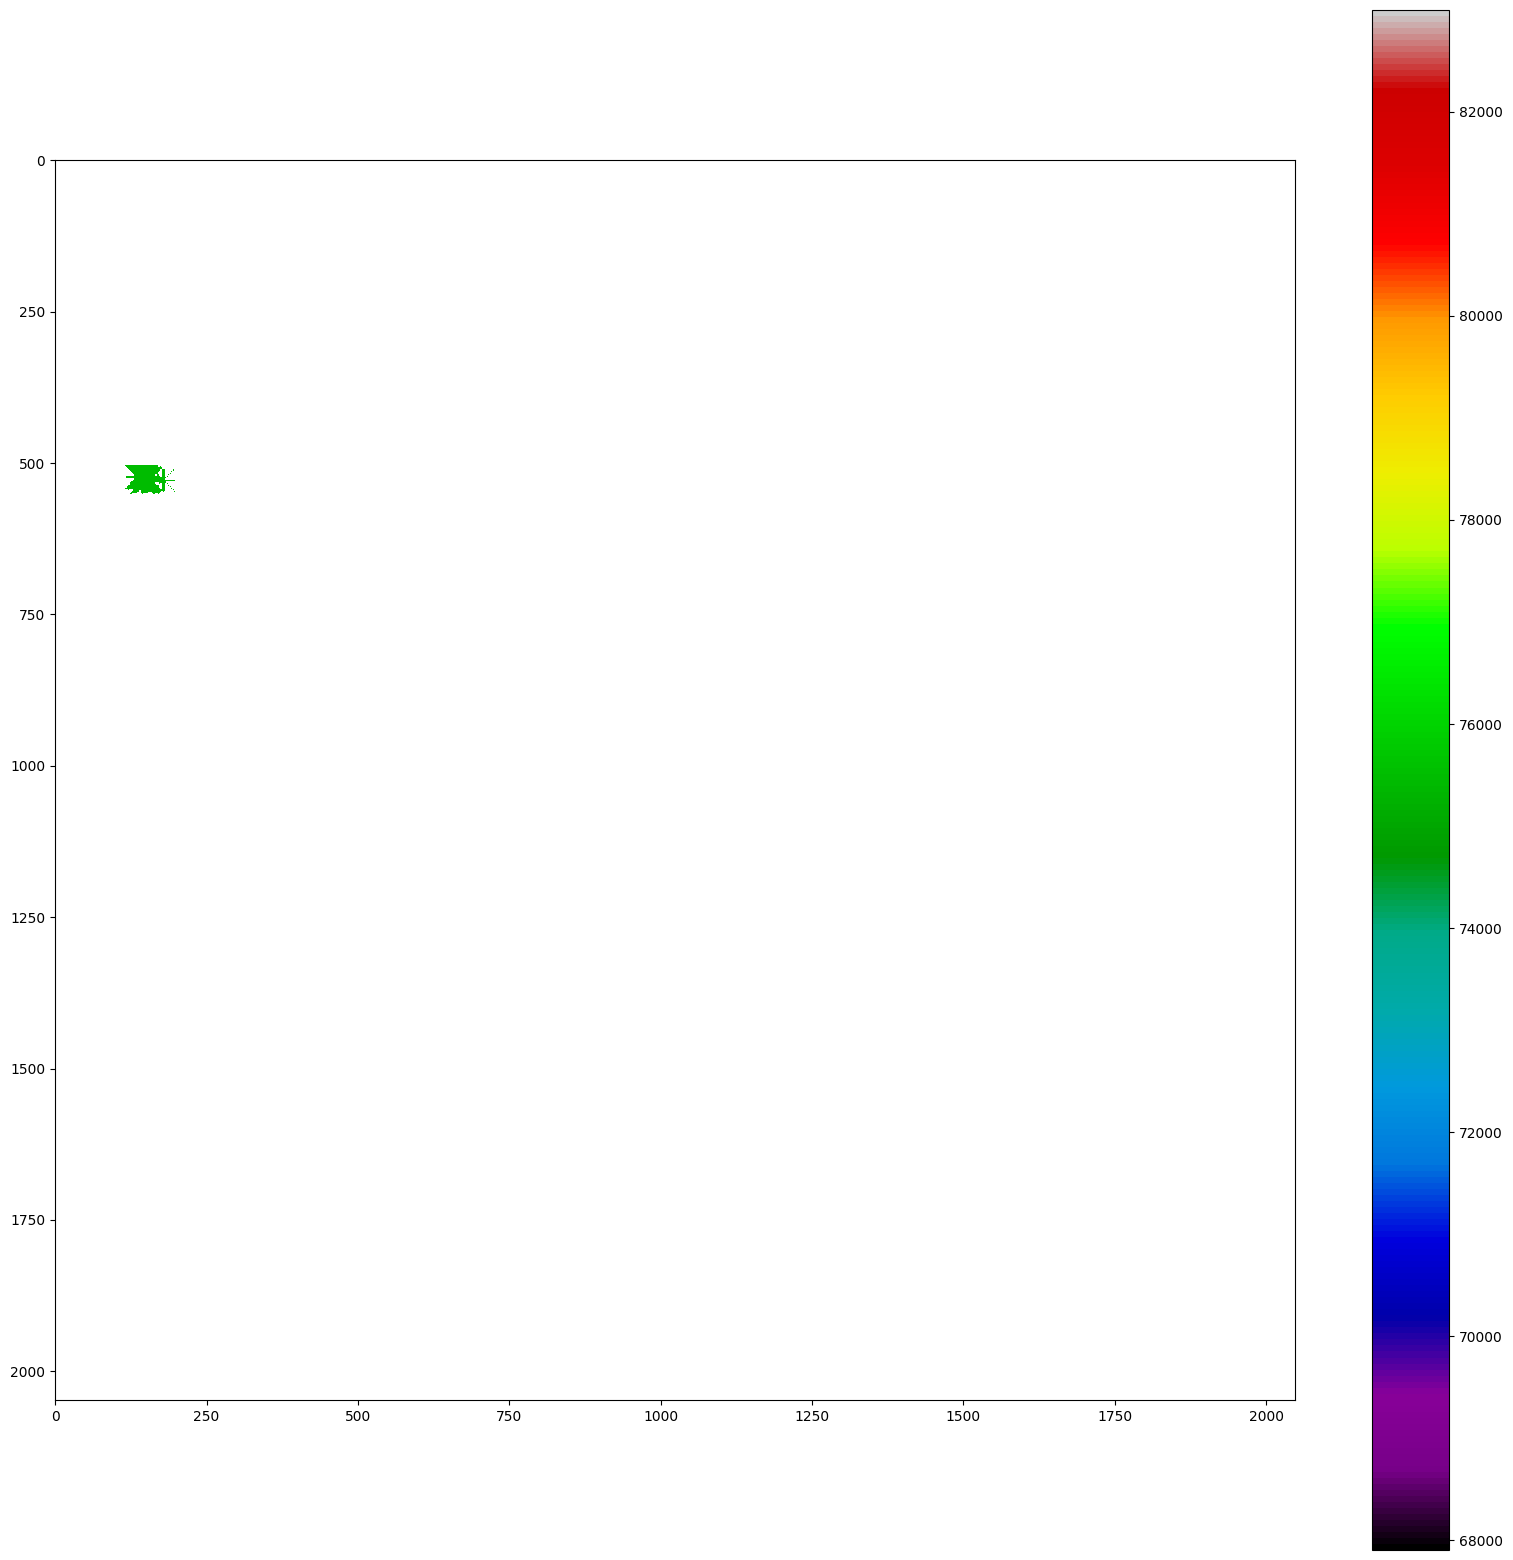

In [9]:
highvel0 = np.copy(data_mom0)
highvel1 = np.copy(data_mom1)

m = 2048
l = 2048

for i in range(0, m):
     for j in range(0, l):
        if highvel0[i,j] != 0.0:
            flag = False

            if highvel1[i,j] < 70000:
                flag = True
        
            if flag:
                highvel0[i,j] = 0.0
                highvel1[i,j] = math.nan 
                
            else:
                for k in range(1,20):
                    if i < (m-k) and j < (l-k) and i > k and j > k:

                        highvel1[i+k,j+k] = highvel1[i,j] 
                        highvel1[i-k,j+k] = highvel1[i,j]  
                        highvel1[i+k,j-k] = highvel1[i,j]  
                        highvel1[i-k,j-k] = highvel1[i,j] 
                        highvel1[i+k,j] = highvel1[i,j] 
                        highvel1[i-k,j] = highvel1[i,j] 
                        highvel1[i,j-k] = highvel1[i,j]
                        highvel1[i,j+k] = highvel1[i,j]


plt.figure(figsize = (20,20))
plt.imshow(highvel0, cmap='CMRmap')
plt.colorbar()

plt.figure(figsize = (20,20))
plt.imshow(highvel1, cmap='nipy_spectral')
plt.colorbar()

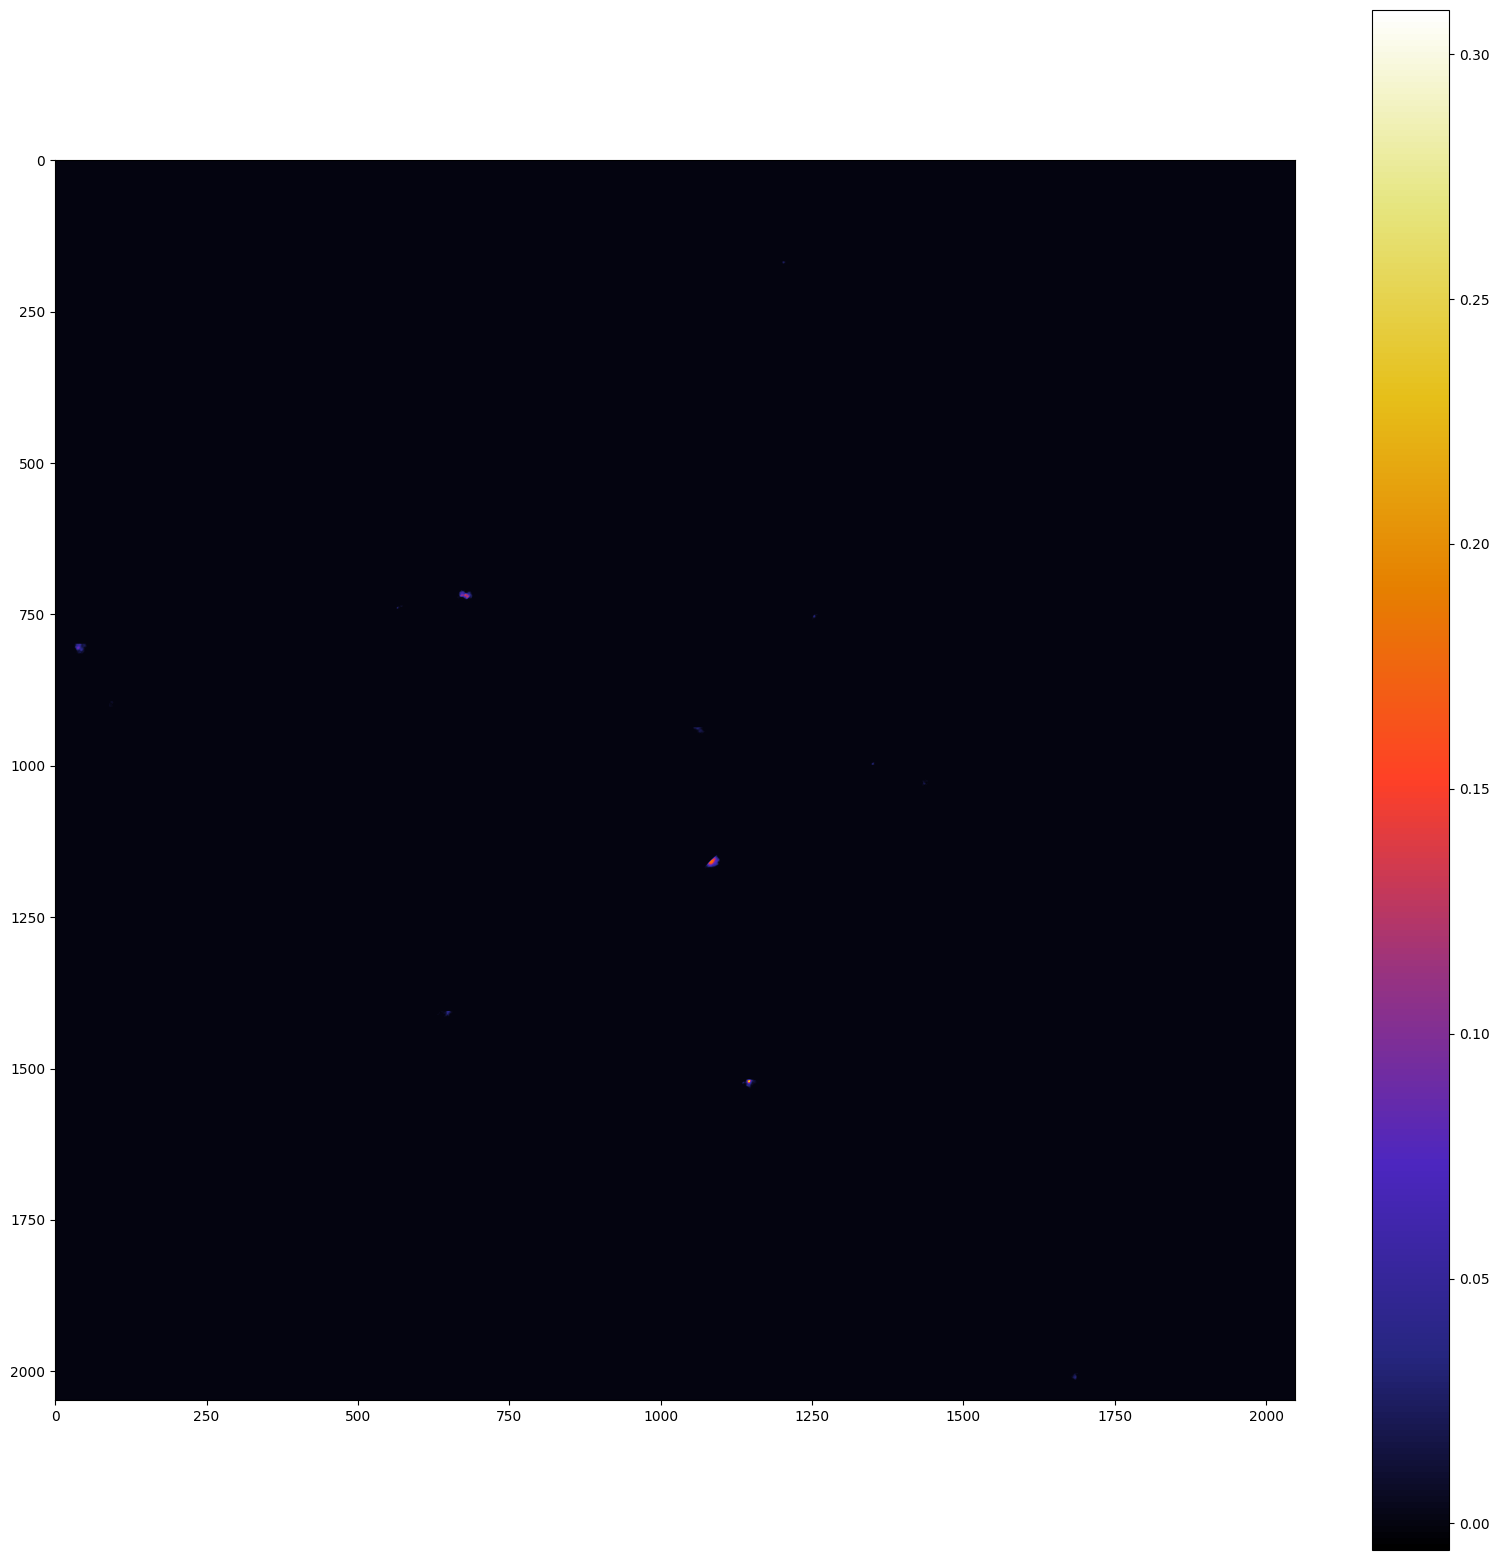

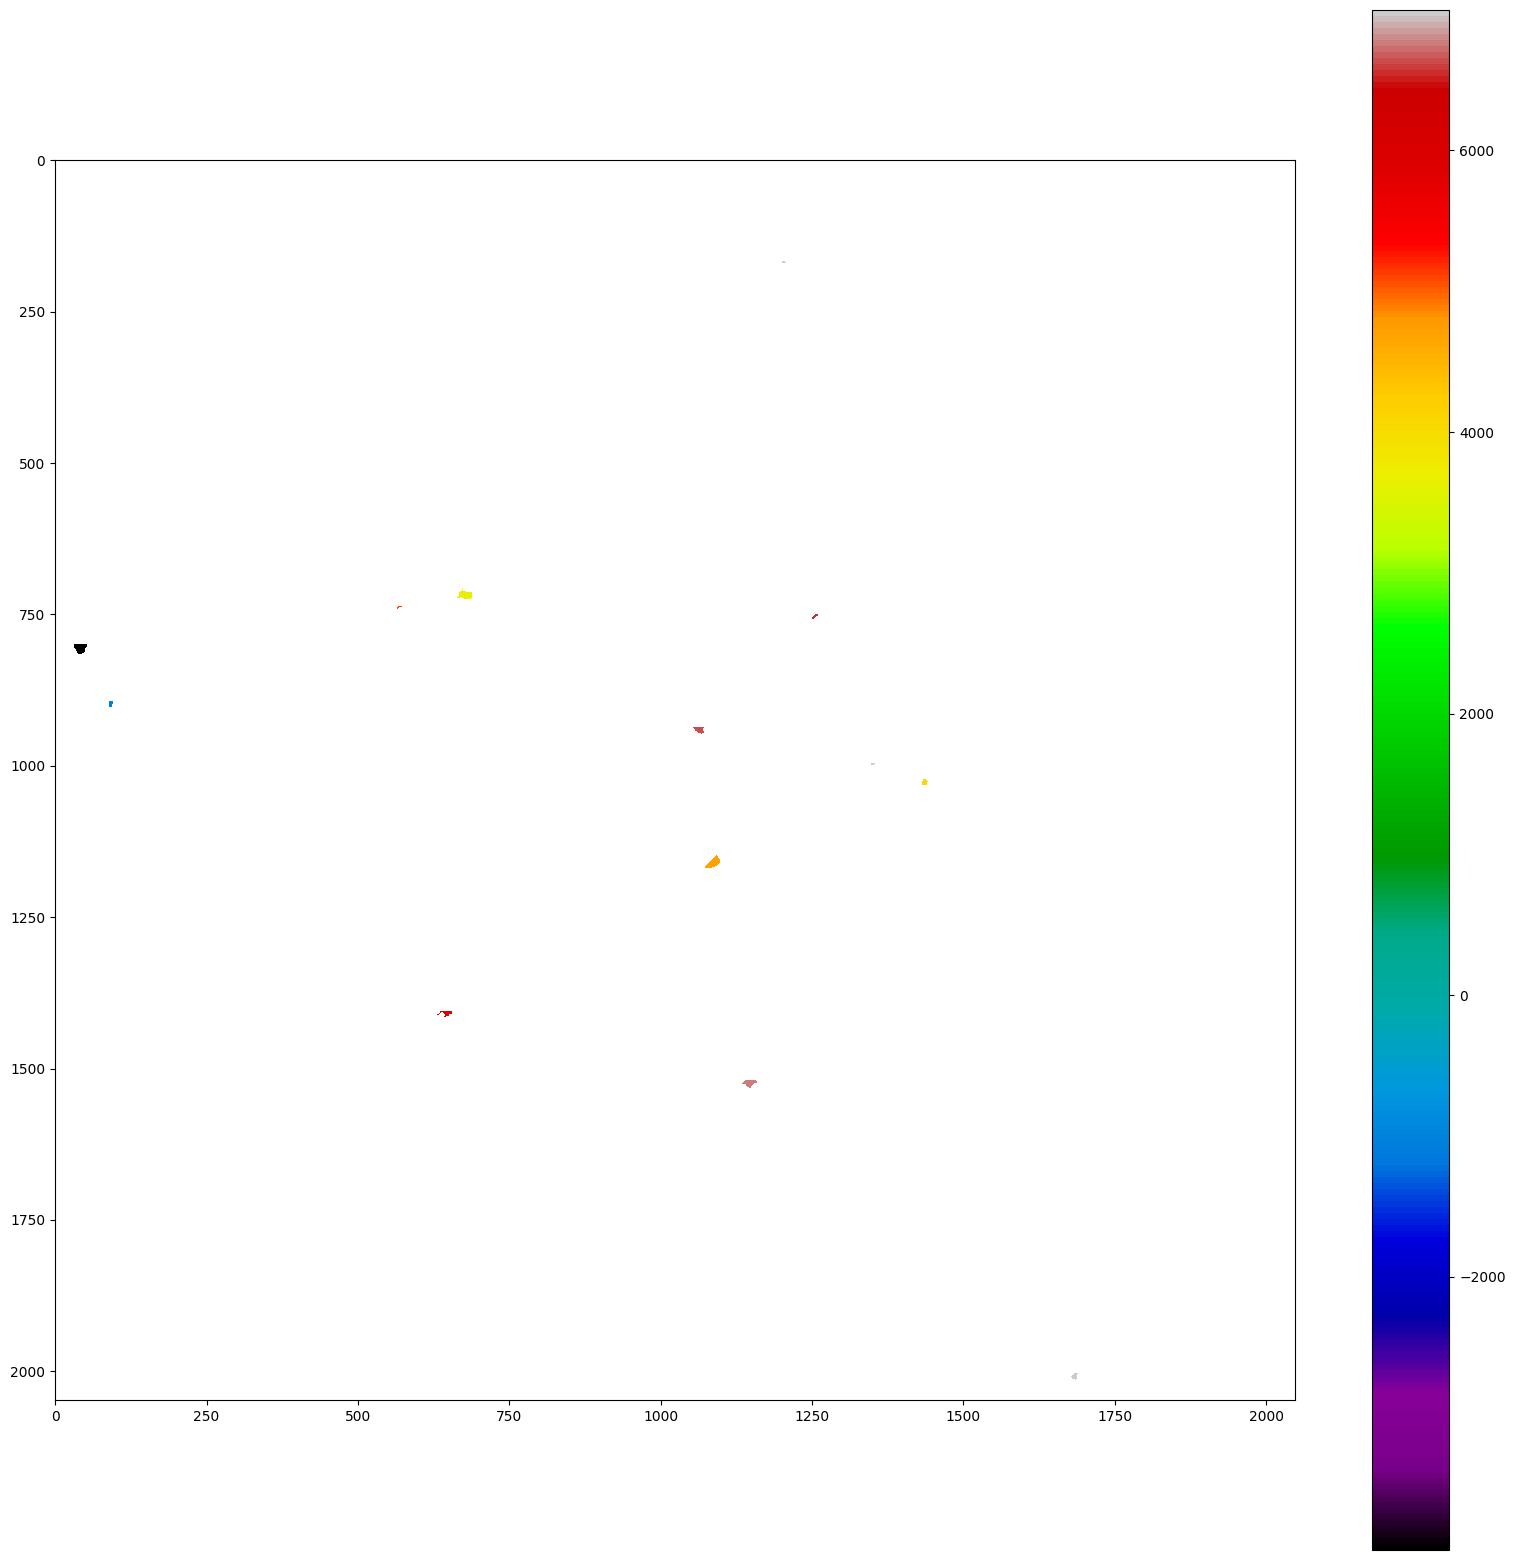

In [31]:
lowvel0 = np.copy(data_mom0)
lowvel1 = np.copy(data_mom1)

m = 2048
l = 2048

for i in range(0, m):
     for j in range(0, l):
        if lowvel0[i,j] != 0.0:
            flag = False

            if lowvel1[i,j] > 7000:
                flag = True
        
            if flag:
                lowvel0[i,j] = 0.0
                lowvel1[i,j] = math.nan
            else:
                for k in range(1,2):
                    if i < (m-k) and j < (l-k) and i > k and j > k:

                        lowvel1[i+k,j+k] = lowvel1[i,j] 
                        lowvel1[i-k,j+k] = lowvel1[i,j]  
                        lowvel1[i+k,j-k] = lowvel1[i,j]  
                        lowvel1[i-k,j-k] = lowvel1[i,j] 
                        lowvel1[i+k,j] = lowvel1[i,j] 
                        lowvel1[i-k,j] = lowvel1[i,j] 
                        lowvel1[i,j-k] = lowvel1[i,j]
                        lowvel1[i,j+k] = lowvel1[i,j]

plt.figure(figsize = (20,20))
plt.imshow(lowvel0, cmap='CMRmap')
plt.colorbar()

plt.figure(figsize = (20,20))
plt.imshow(lowvel1, cmap='nipy_spectral')
plt.colorbar()